In [4]:
import pandas as pd  #data manipulation analysis library
import numpy as np #numerical computations
import seaborn as sns # data viz lib on matplotlib
import matplotlib.pyplot as plt #matlab like interface for plot and charts

In [5]:
df= pd.read_csv('Mall_Customers.csv') #reads csv file into df dataframe
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.shape #col,row

(200, 5)

In [7]:
#dataframe summary - non-null values,datatypes,memory usage
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:
#extracting columnbased on index number
X = df.iloc[:, [3,4]].values #integer-based indexing to extract col 3,4

Performing elow method to find optimal no. of clusters


In [9]:
from sklearn.cluster import KMeans #KMeans algo to oartition n obs into k clusters, each obs belongong to cluster with nearest mean
wcss = []    # within-cluster-sum-of-squares to find optimal no.of clusteers by minimising dist of data pt and centroid

In [10]:
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init ='k-means++', random_state = 0)  #k-mean++ to place intial centroids far away from each other for better result
  kmeans.fit(X)
  wcss.append ( kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Plotting Elbow Method
Heuristic used to find no.of clusters in dataset.The explained variation changes rapidly for some values of k (the number of clusters), and then levels off — a curve like an elbow. It appears that 5 is the optimal number of clusters in this data.

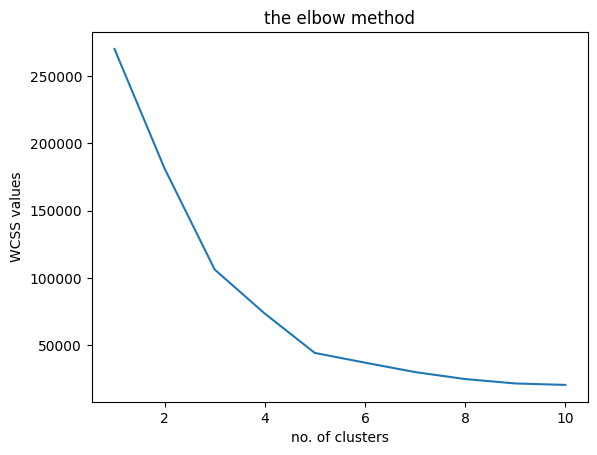

In [11]:
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS values')
plt.show()
#elbow at 5

Applying KMeans clustering

In [12]:
kmeansmodel = KMeans(n_clusters = 5, init='k-means++', random_state =0)
y_kmeans = kmeansmodel.fit_predict (X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


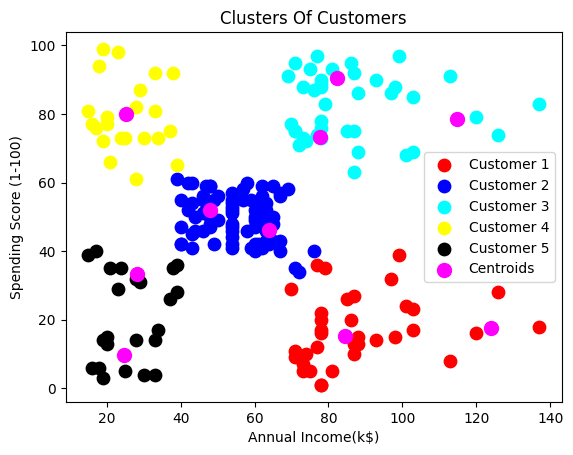

In [13]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=80, c="red", label = 'Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=80, c="blue", label = 'Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=80, c="cyan", label = 'Customer 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=80, c="yellow", label = 'Customer 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=80, c="black", label = 'Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='magenta',label ='Centroids')
plt.title('Clusters Of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

